In [264]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

## Create the Training Dataset
#### Uncomment the _11 lines of code_ for explanation only!

In [265]:
train = "/Users/chris/ChestX/chest_xray/train"  #substitute your file path here
CATEGORIES  = ['PNEUMONIA', 'NORMAL']
IMG_SIZE = 128
training_data = []

def create_training_data():
    for category in CATEGORIES:
        
        '''path to Pneumonia or Normal'''
        path = os.path.join(train, category)
        
        '''classification of Pneumonia or Normal based on file location'''
        class_num = CATEGORIES.index(category) 
        
        for img in os.listdir(path):
            try:
                '''inputting the image from the file path'''
                img_array= cv2.imread(os.path.join(path,img))
                
                '''Uncomment the 4 lines of code below to reveal
                the classification, the original image's shape,
                the image in vector form, and the image itself .'''
#                 print("Classification:", category)               #Code line 1
#                 print("Original Shape:\n",img_array.shape,"\n")  #Code line 2
#                 print("Original Vector:\n",img_array, "\n")      #Code line 3
#                 print("Original Image:\n", plt.imshow(img_array))#Code line 4
#                 plt.show()                                       #Code line 5
                
                
                '''resizing the image to 128 x 128 pixels'''
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                
                '''Uncomment the 4 lines of code below to reveal the
                new image's shape, vector form, and the image'''
#                 print("New Shape:\n",new_array.shape,"\n")       #Code line 6
#                 print("New Vector:\n", new_array, "\n")          #Code line 7
#                 print("New Image:\n",plt.imshow(new_array))      #Code line 8
#                 plt.show()                                       #Code line 9
                
                '''Don't forget to uncomment the 2 break statements below!'''
#                 break                                            #Code line 10
                
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        '''Uncomment the below line of code as well!'''
#         break                                                    #Code line 11 
create_training_data()


'''If all steps have been performed correctly this
reveals that 5232 training images have been processed'''
print(len(training_data))

5232


## Shuffle the training data to randomize

In [266]:
random.shuffle(training_data)  # to shuffle the training data

for sample in training_data:   #to prove that the data has been shuffled
    print(sample[1])

1
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
0
0
0
1
1
1
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
1
0
1
1
1
1
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
1
0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
0
0
0
0
0
1
0
1
0
1
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
0
0
1
0


In [267]:
X_train  = [] #feature set
y_train  = [] #labels

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
     
'''    
Normalization to make the pixels of the X-ray to be within a
range of 0 and 1 this is a best practice to enable Convolutional
Neural Networks to predict with a higher degree of accuracy    
''' 
    
X_train = np.array(X_train)/255.0

## Pickle Train Data

In [268]:
pickle_out = open("X_train.pickle",'wb')
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle",'wb')
pickle.dump(y_train,pickle_out)
pickle_out.close()

# Create the Test Dataset

In [291]:
test = "/Users/chris/ChestX/chest_xray/test"    #substitute your file path here
CATEGORIES  = ['PNEUMONIA', 'NORMAL']
IMG_SIZE = 128
test_data = []

def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(test, category) #path to pneumonia or normal
        class_num = CATEGORIES.index(category) #classification of pneumonia or normal based on the file location
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                test_data.append([new_array, class_num])
            except Exception as e:
                pass
create_test_data()

## Shuffle the test data to randomize

In [292]:
random.shuffle(test_data)  # to shuffle the training data

for sample in test_data:   #to prove that the data has been shuffled
    print(sample[1])

1
0
0
1
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
1
1
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
0
0
1
1
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
1
0
0
1
1
0
0
1
0
0
1
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
1
1
1
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
1
0
1
0
0
1
0
1
0
1
1
1
1
0
1
1
1
0
0
0
1
0
0
0
0
1
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
1
0
1
0
1
0
1
1
1
0
0
1
0
1
0
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
1
1
0
1
1
0
1
0
1
0
0
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
0
0
1
1
0
1
1
0
0
1
1
0
0
1
1
0
0
0
1
0
1
0
1
1
1
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
1
0
1
0
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
1
0
1
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
1
0
1
0
1
0
0
1
1
0
0
1
1
1
0
1
0
0
0
1
0
0
0
0
1
0


In [294]:
X_test = []
y_test = []

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
    
'''    
Normalization to make the pixels of the X-ray to be within a
range of 0 and 1 this is a best practice to enable Convolutional
Neural Networks to predict with a higher degree of accuracy    
'''   

X_test = np.array(X_test)/255.0

## Pickle Test Data

In [296]:
pickle_out = open("X_test.pickle",'wb')
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle",'wb')
pickle.dump(y_test,pickle_out)
pickle_out.close()

# Input Training and Testing Data as arrays

In [297]:
pickle_in = open("X_train.pickle",'rb')
X_train = np.array(pickle.load(pickle_in))

pickle_in = open("y_train.pickle",'rb')
y_train = np.array(pickle.load(pickle_in))

pickle_in = open("X_test.pickle",'rb')
X_test = np.array(pickle.load(pickle_in))

pickle_in = open("y_test.pickle",'rb')
y_test = np.array(pickle.load(pickle_in))

# Convolutional Neural Network Model

In [298]:
'''
dense_layers, layer_sizes, and conv_layers are written in as
variables & taken in a list format so multiple values can be
substituted to compare different model parameters as desired.
'''

dense_layers= [2]
layer_sizes = [32]
conv_layers  = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME= "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer, int(time.time()))  #naming convention used
            tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME)) #callback to generate files for tensorboard visualizations
            print(NAME)

            model = Sequential()

            #first layer
            model.add(Conv2D(layer_size, (3,3), input_shape= X.shape[1:])) 
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size =(2,2)))

            for l in range(conv_layer -1):
                #second layer (CONVOLUTION)
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size =(2,2)))
            model.add(Flatten())
            for l in range(dense_layer):  #this converts the 3D feature maps to 1D feature vectors
                #third layer (DENSE)
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                model.add(Dropout(.1))   #optional dropout

            #output layer
            model.add(Dense(1))
            model.add(Activation("sigmoid"))

            model.compile(loss = "binary_crossentropy",
                         optimizer  = "adam",
                         metrics  = [tf.keras.metrics.TruePositives(name='tp'),
                                      tf.keras.metrics.FalsePositives(name='fp'),
                                      tf.keras.metrics.TrueNegatives(name='tn'),
                                      tf.keras.metrics.FalseNegatives(name='fn'), 
                                      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                      tf.keras.metrics.Precision(name='precision'),
                                      tf.keras.metrics.Recall(name='recall'),
                                      tf.keras.metrics.AUC(name='auc')
                                        ]) 

            model.fit(X_train,y_train, batch_size = 22,epochs = 15, validation_data = (X_test, y_test), verbose =  1, callbacks=[tensorboard])
            
model.save(NAME,'-CNN.model')

3-conv-32-nodes-2-dense-1585776403
Train on 5232 samples, validate on 624 samples
Epoch 1/15
5232/5232 [==============================] - 30s 6ms/sample - loss: 0.2755 - tp: 870.0000 - fp: 106.0000 - tn: 3777.0000 - fn: 479.0000 - accuracy: 0.8882 - precision: 0.8914 - recall: 0.6449 - auc: 0.9316 - val_loss: 0.7578 - val_tp: 99.0000 - val_fp: 7.0000 - val_tn: 383.0000 - val_fn: 135.0000 - val_accuracy: 0.7724 - val_precision: 0.9340 - val_recall: 0.4231 - val_auc: 0.8805
Epoch 2/15
5232/5232 [==============================] - 25s 5ms/sample - loss: 0.1318 - tp: 1222.0000 - fp: 125.0000 - tn: 3758.0000 - fn: 127.0000 - accuracy: 0.9518 - precision: 0.9072 - recall: 0.9059 - auc: 0.9850 - val_loss: 0.8833 - val_tp: 95.0000 - val_fp: 3.0000 - val_tn: 387.0000 - val_fn: 139.0000 - val_accuracy: 0.7724 - val_precision: 0.9694 - val_recall: 0.4060 - val_auc: 0.8800y: 0.9512 - precision: 0.9081 - recall: 0.9040 - au
Epoch 3/15
5232/5232 [==============================] - 25s 5ms/sample - los

5232/5232 [==============================] - 50s 10ms/sample - loss: 0.0546 - tp: 1302.0000 - fp: 57.0000 - tn: 3826.0000 - fn: 47.0000 - accuracy: 0.9801 - precision: 0.9581 - recall: 0.9652 - auc: 0.9969 - val_loss: 0.7267 - val_tp: 116.0000 - val_fp: 5.0000 - val_tn: 385.0000 - val_fn: 118.0000 - val_accuracy: 0.8029 - val_precision: 0.9587 - val_recall: 0.4957 - val_auc: 0.9064
Epoch 7/15
5232/5232 [==============================] - 50s 10ms/sample - loss: 0.0406 - tp: 1315.0000 - fp: 39.0000 - tn: 3844.0000 - fn: 34.0000 - accuracy: 0.9860 - precision: 0.9712 - recall: 0.9748 - auc: 0.9981 - val_loss: 1.0413 - val_tp: 107.0000 - val_fp: 3.0000 - val_tn: 387.0000 - val_fn: 127.0000 - val_accuracy: 0.7917 - val_precision: 0.9727 - val_recall: 0.4573 - val_auc: 0.8551
Epoch 8/15
5232/5232 [==============================] - 50s 10ms/sample - loss: 0.0369 - tp: 1317.0000 - fp: 39.0000 - tn: 3844.0000 - fn: 32.0000 - accuracy: 0.9864 - precision: 0.9712 - recall: 0.9763 - auc: 0.9988 - 

Epoch 8/15
5232/5232 [==============================] - 110s 21ms/sample - loss: 0.0277 - tp: 1325.0000 - fp: 26.0000 - tn: 3857.0000 - fn: 24.0000 - accuracy: 0.9904 - precision: 0.9808 - recall: 0.9822 - auc: 0.9990 - val_loss: 2.2457 - val_tp: 48.0000 - val_fp: 0.0000e+00 - val_tn: 390.0000 - val_fn: 186.0000 - val_accuracy: 0.7019 - val_precision: 1.0000 - val_recall: 0.2051 - val_auc: 0.7676
Epoch 9/15
5232/5232 [==============================] - 111s 21ms/sample - loss: 0.0327 - tp: 1318.0000 - fp: 37.0000 - tn: 3846.0000 - fn: 31.0000 - accuracy: 0.9870 - precision: 0.9727 - recall: 0.9770 - auc: 0.9991 - val_loss: 1.1978 - val_tp: 116.0000 - val_fp: 6.0000 - val_tn: 384.0000 - val_fn: 118.0000 - val_accuracy: 0.8013 - val_precision: 0.9508 - val_recall: 0.4957 - val_auc: 0.8702
Epoch 10/15
5232/5232 [==============================] - 117s 22ms/sample - loss: 0.0249 - tp: 1331.0000 - fp: 29.0000 - tn: 3854.0000 - fn: 18.0000 - accuracy: 0.9910 - precision: 0.9787 - recall: 0.986

In [299]:
model.evaluate(X_test, y_test, verbose=1)

624/624 [==============================] - 4s 6ms/sample - loss: 1.7288 - tp: 78.0000 - fp: 4.0000 - tn: 386.0000 - fn: 156.0000 - accuracy: 0.7436 - precision: 0.9512 - recall: 0.3333 - auc: 0.8058


[1.7287565515591548,
 78.0,
 4.0,
 386.0,
 156.0,
 0.74358976,
 0.9512195,
 0.33333334,
 0.80583507]

In [300]:
model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 126, 126, 128)     3584      
_________________________________________________________________
activation_250 (Activation)  (None, 126, 126, 128)     0         
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 61, 61, 128)       147584    
_________________________________________________________________
activation_251 (Activation)  (None, 61, 61, 128)       0         
_________________________________________________________________
max_pooling2d_127 (MaxPoolin (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 28, 28, 128)     

## Tensorboard Visualization

run the following command to see a local tensorboard visualization

In [ ]:
!tensorboard --logdir='logs/'

'''
click on the link in the output that should be:
'http://localhost:[PORT]/'
'''

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.1.0 at http://localhost:6006/ (Press CTRL+C to quit)


# Model Prediction

##### Make sure to substitute your local file path: (i.e. "X-Rays/image_1") with the text:
##### "[YOUR FILE PATH FOR AN IMAGE TO PREDICT GOES HERE]"
##### in the code cell below

In [210]:
CATEGORIES = ["PNEUMONIA","NORMAL"]

def prepare(filepath):
    IMG_SIZE= 128 #resize the image to be similar to other images
    img_array = cv2.imread(filepath)
    new_array =  cv2.resize(img_array, (IMG_SIZE,  IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)

model = tf.keras.models.load_model(NAME,'-CNN.model')

PNEUMONIA
AxesImage(54,36;334.8x217.44)


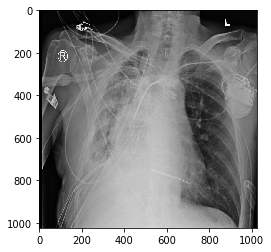

In [211]:
prediction = model.predict([prepare('[YOUR FILE PATH FOR AN IMAGE TO PREDICT GOES HERE]')])

print(CATEGORIES[int(prediction[0][0])])
print(plt.imshow(cv2.imread("[YOUR FILE PATH FOR AN IMAGE TO PREDICT GOES HERE]")))

PNEUMONIA
AxesImage(54,36;334.8x217.44)


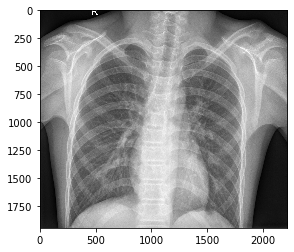

In [212]:
prediction  = model.predict([prepare('[YOUR FILE PATH FOR AN IMAGE TO PREDICT GOES HERE]')])

print(CATEGORIES[int(prediction[0][0])])
print(plt.imshow(cv2.imread('[YOUR FILE PATH FOR AN IMAGE TO PREDICT GOES HERE]')))